### Исследование закономерностей продаж игр

**Цель проекта:** выявить определяющие успешность игры закономерности, для планирования будущих рекламных кампаний. 

**Исходные данные:** массив данных за 30 - летний период о продажах игр, с оценками пользователей и экспертов, жанрами и платформами. 

**План работы** включает несколько основных этапов:

**Этап 1. Подготовка данных.** 
- удаление дубликатов
- работа с пропусками 
- изменение типов данных

**Этап 2. Исследовательский анализ.**
- построить распределение по выпускаемым играм и платформам
- определить актуальный временной период для дальнейшего анализа
- определить потенциально прибыльные платформы 
- рассчитать зависимость общих продаж на платформах от отзывов критиков и отзывов пользователей
- определить наиболее прибыльные жанры 

**Этап 3. Определить предпочтения пользователей по регионам.**
- найти наиболее популярные платформы для каждого региона
- найти наиболее популярные жанры для каждого региона
- определить зависимость общих продаж от рейтинга игр

**Этап 4. Проверить гипотезы.**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные

**Описание данных:**

***Name*** — название игры

***Platform*** — платформа

***Year_of_Release*** — год выпуска

***Genre*** — жанр игры

***NA_sales*** — продажи в Северной Америке (миллионы проданных копий)

***EU_sales*** — продажи в Европе (миллионы проданных копий)

***JP_sales*** — продажи в Японии (миллионы проданных копий)

***Other_sales*** — продажи в других странах (миллионы проданных копий)

***Critic_Score*** — оценка критиков (максимум 100)

***User_Score*** — оценка пользователей (максимум 10)

***Rating*** — рейтинг от организации ESRB. Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t
pd.options.mode.chained_assignment = None

In [3]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv(r'C:\Users\Анастасия\Downloads\games.csv')

In [4]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Из таблицы видно, что есть строки с полносью заполненными колонками, но есть и такие, где полностью отсутствует информация об оценках от критиков и пользователей и рейтинг игры.

Всего в данных 16715 строк, немного пропусков в столбцах **name, year_of_release, genre**. Около 50% данных отсутствует в столбцах **critic_score, user_score, ratint**.

Тип данных в некоторых столбцах необходимо заменить, например, **год выпуска** на int, **user_score** на float. Кроме, нечисловых значений в столбце **user_score** аномалий по значениям не замечено.

### Шаг 2. Подготовьте данные

#### 2.1. Замените названия столбцов (приведите к нижнему регистру)

In [7]:
df.columns = df.columns.str.lower()

#### 2.2. Преобразуйте данные в нужные типы

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


1) Столбец **year_of_release** ужно заменить сначала на 'datetime', а затем на 'int', так как нам нужен только год. 

2) Столбец **critic_score** можно заменить на 'int', так как все значения целые.

3) Столбец **user_score** можно заменить на 'float64', но сначала нужно обработать пропуски в нем и значение 'tbd'.

Во всех столбцах, в которых необходимо заменить данные, есть пропуски.

In [9]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format = '%Y').dt.year.astype('Int64')

#### 2.3. Обработка пропусков

In [10]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**1.** В столбцах **'name'** и **'genre'** есть 2 пропуска, которые нельзя логически заменить, поэтому удалим эти строки. 

**2.** Также есть небольшое количество пропусков в столбце **'year_of_release'**, их можно заполнить значениями из самой таблицы, так как некоторые игры представлены на разных платформах. Можно предположить, что пропуски случайны (либо не внесены данные, либо были удалены при скачивании).

**3.** Много пропусков в столбцах **'critic_score'**, **'user_score'**, **'rating'**. Также в **'user_score'** встречается значение **'tbd'**, которое переводится как 'подлежит уточнению'. Возможно для этих игр изменялся рейтинг и он еще не внесет в таблицу или просто информация проверяется.

Сложно сказать, чем вызваны пропуски в столбце **'rating'**, возможно, это распространяется только на игры из стран США и Канады или рейтинг составлен не для всех игр. Можно посмотреть на распределение пропусков, на жанр игр и на платформу, чтобы найти чем вызваны пропуски. 

In [11]:
#2.3.1
df = df.dropna(subset = ['name']).reset_index(drop=True)
#все одинаковые строчки
df = df.drop_duplicates().reset_index(drop = True)

In [12]:
#2.3.2
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


В данном случае не видно какой-то зависимости от платформы или жанра и пропусками в столбце **"year_of_release"**. 

Например, для игры **"Madden NFL 2004"** на 3 из 4 платформ будет информация о дате выхода.

In [13]:
df.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1880,Madden NFL 2004,XB,2003,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3888,Madden NFL 2004,GC,2003,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5707,Madden NFL 2004,GBA,2003,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [14]:
#в данном примере название игры совпадает, но разные платформы и даты выхода
df.query('name == "Space Invaders"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4263,Space Invaders,SNES,1994,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8579,Space Invaders,N64,1999,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10382,Space Invaders,GBA,2002,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


In [15]:
#заменим пропуски значениями моды года выпуска, которые уже есть в таблице для этих игр.
#for i in df[df['year_of_release'].isna() == True].index:  
#    df['year_of_release'][i] = df.loc[df['name'] == df['name'][i], 'year_of_release'].mode()

In [16]:
#2.3.3. 
(df
   .query('rating != rating')
   .value_counts(['platform', 'genre', 'year_of_release']).head(20)
   .to_frame()
)

0
platform genre        year_of_release    
PSP      Adventure    2010             62
         Action       2012             50
DS       Misc         2008             48
PSP      Adventure    2011             47
PSV      Action       2015             41
DS       Adventure    2008             40
PS       Sports       1998             39
DS       Misc         2007             39
PS       Sports       1996             38
PS2      Adventure    2008             37
DS       Misc         2010             35
PS2      Adventure    2006             32
PS       Racing       1998             31
         Sports       1997             31
         Action       1998             31
PSP      Role-Playing 2011             30
PSV      Action       2016             30
DS       Misc         2006             29
PSP      Adventure    2013             29
PS       Sports       1999             28

Из таблицы с пропусками в **rating** нет каких-либо явных зависимостей по платформе или году выпуска. При этом можно увидеть, что большая часть пропусков в таких жанрах как **'Adventure, Action, Misc, Sports'** и на платформах **PS, DS, PS2, PSP, PS3**.

Посмотрим, какие рейтинги чаще всего встречаются для этих жанров.

In [17]:
(df
   .query('rating == rating and genre == ["Action", "Sports", "Misc", "Adventure"]')
   .groupby(['rating', 'genre'])['genre'].count().to_frame()
)

genre
rating genre           
AO     Action         1
E      Action       416
       Adventure    162
       Misc         457
       Sports      1188
E10+   Action       481
       Adventure     68
       Misc         167
       Sports       107
EC     Action         1
       Adventure      2
       Misc           5
K-A    Misc           1
M      Action       608
       Adventure     99
       Misc          13
       Sports        16
T      Action       681
       Adventure    115
       Misc         239
       Sports       198

Видно, что для всех рассматриваемых жанров есть разные рейтинги, поэтому нельзя зная только жанр, подставить значения рейтинга. 

Таким образом, пропуски придется оставить.

Для пропусков в **critic_score** посмотрим зависимость по платформам и годам выпуска.

In [18]:
(df
   .query('critic_score != critic_score')
   .value_counts(['platform', 'year_of_release'], normalize = True).to_frame().head(15)
)

0
platform year_of_release          
DS       2008             0.036402
         2009             0.034984
         2010             0.031557
PS       1998             0.026356
DS       2007             0.025411
Wii      2009             0.021038
         2010             0.020801
PS       1997             0.020447
         1999             0.019619
         1996             0.018674
PS2      2008             0.017374
PSP      2010             0.017137
PS2      2007             0.016665
Wii      2008             0.016428
DS       2011             0.015837

Из таблицы видно, что больше всего пропусков по платформам **DS, PS**, что скорее всего связано с тем, что на них приходится больше игр из всего датафрейма.

По годам нет особой зависимости: **есть пропуски в относительно старых и новых играх**.

In [19]:
df.query('critic_score != critic_score').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Видно, что пропуски в **critic_score** и **user_score** в большинстве совпадают. 

Для пропусков в **user_score** посмотрим зависимость по платформам и годам выпуска.

In [21]:
(df
   .query('user_score != user_score')
   .value_counts(['platform', 'year_of_release'], normalize = True).to_frame().head(15)
)

0
platform year_of_release          
PS       1998             0.034065
DS       2008             0.028463
PS       1997             0.026344
         1999             0.025435
DS       2007             0.023921
PS       1996             0.023921
DS       2010             0.021802
         2009             0.021196
PSP      2010             0.019379
         2011             0.018471
PS2      2006             0.018471
         2007             0.017108
N64      1999             0.015443
PSP      2012             0.015443
PS       1995             0.014989

В данном случае видно, что большая часть пропусков характера для 2-х платформ **(PS и DS)**, в пропусках встречаются достаточно старые игры (1997-1999). Если для старых игр можно понять, почему нет оценок пользователей, то для более новых игр это не очевидно. 

Также в **user_score** есть значение 'tbd', посмотрим на его распределение.

In [22]:
(df
   .query('user_score == "tbd"')
   .value_counts(['platform', 'year_of_release'], normalize = True).to_frame().head(15)
)

0
platform year_of_release          
DS       2009             0.078283
         2008             0.077020
         2010             0.060606
Wii      2009             0.055976
         2010             0.053451
DS       2007             0.043350
GBA      2002             0.034933
Wii      2008             0.026936
DS       2011             0.026094
Wii      2011             0.025673
GBA      2004             0.020202
         2001             0.018519
PS2      2008             0.018098
XB       2002             0.015572
GBA      2005             0.015572

Большая часть принадлежит 3-м платформам: **DS, Wii, GBA** (по поиску в Интернете они принадлежат одной компании). По годам больше всего значений 'tbd' встречается в **2007-2011**. Можно предположить, что это связано с обработкой оценок в компании, возможно, периодическому перерасчету их.

In [23]:
df.query('user_score!=user_score').head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [24]:
#заменим все значения "tbd" на пропуски
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.NaN
df['user_score'] = df['user_score'].astype('float')

In [26]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Проверили данные на явные дубликаты, удалили строчки с пропусками в столбцах **name и genre**. Значения 'tbd' в **user_score** заменили на Nan и изменили тип данных.

К сожалению, не удалось заполнить пропуски в рейтинге, отзывах критиков и отзывах пользователей, чтобы в дальнейшем при анализе работать только с исходными данными.

#### 2.4. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [27]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

In [28]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Шаг 3. Проведите исследовательский анализ данных

#### 3.1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [29]:
df['year_of_release'].value_counts().to_frame()

,year_of_release
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775
2004,762


Эти данные включают в себя дубликаты с разных платформ.

In [30]:
df_3_1 = df[['name', 'year_of_release']]
df_3_1 = df_3_1.drop_duplicates().reset_index(drop = True)
df_3_1['year_of_release'].value_counts().to_frame()

,year_of_release
2008,1039
2009,1001
2010,900
2007,884
2011,779
2006,773
2005,657
2002,631
2004,550
2003,546


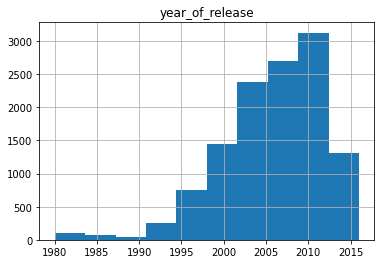

In [31]:
df_3_1.hist();

Больше всего игр выпускалось в 2006 - 2011 гг. Видно, что в левой части гистограммы довольно низкие значения, с 1995 года начинается постепенное увеличение, поэтому можно взять значения с 200 игр в год и это соответсвует 1995 году и рассматривать уже только **период 1995-2016**.

#### 3.2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [32]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending = False).to_frame()

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


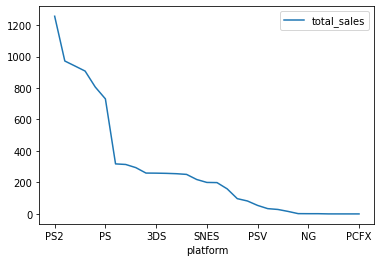

In [33]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending = False).to_frame().plot();

График делится на 2 части: слева от PS продажи более 300 и более крутой подъем, справа от PS общие продажи постепенно снижаются по платформам.

Из таблицы хорошо видно различие в общих продажах между **PS (730)** и **GBA (317)**, поэтому возьмем **ТОП-6 платформ.** 

In [34]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending = False).to_frame().head(6)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86


Чтобы задать условие для свобдной таблицы необходимо изменить тип данных у даты выхода, поэтому придется удалить строки с пропусками в этом столбце.

In [35]:
df = df.dropna(subset = ['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype('int')

In [36]:
(df
    .query('platform == ["PS2", "X360", "PS3", "Wii", "PS", "DS"] and year_of_release >= 1995')
    .pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum')
).head(60)

total_sales
platform year_of_release             
DS       2004                   17.27
         2005                  130.14
         2006                  119.81
         2007                  146.94
         2008                  145.31
         2009                  119.54
         2010                   85.02
         2011                   26.18
         2012                   11.01
         2013                    1.54
PS       1995                   35.96
         1996                   94.70
         1997                  136.17
         1998                  169.49
         1999                  144.53
         2000                   96.37
         2001                   35.59
         2002                    6.67
         2003                    2.07
PS2      2000                   39.17
         2001                  166.43
         2002                  205.38
         2003                  184.31
         2004                  211.81
         2005                  160.66
         2006                  103.42
         2007                   75.99
         2008                   53.90
         2009                   26.40
         2010                    5.64
         2011                    0.45
PS3      2006                   20.96
         2007                   73.19
         2008                  118.52
         2009                  130.93
         2010                  142.17
         2011                  156.78
         2012                  107.36
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
Wii      2006                  137.15
         2007                  152.77
         2008                  171.32
         2009                  206.97
         2010                  127.95
         2011                   59.65
         2012                   21.71
         2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
X360     2005                    8.25
         2006                   51.62
         2007                   95.41
         2008                  135.26
         2009                  120.29
         2010                  170.03
         2011                  143.84

Из свобной таблицы хорошо видно, что одна платформа начинает и заканчивает свой путь за **8-10 лет**. 

Происходит стремительный рост, пик и затем спад. Среди тех компаний, которые были отобраны, все находятся в периоде спада или вообще более не функционируют, поэтому чтобы сделать прогноз на ближайщий год необходимо брать компании, которые вышли на рынок 2-4 года назад, тогда, в следующем году есть вероятность увидеть их рост.

In [37]:
#построим график для наглядности
platforms = ["PS2", "X360", "PS3", "Wii", "PS", "DS"]

In [38]:
years = pd.DataFrame(range(1995, 2017))
years.columns = ['year']

In [39]:
#функция для объединения total_sales по всем выбранным платформам в период с 1995 по 2016 гг.
def table_merge(data):
    for plat in platforms:
        result = data.loc[(data['platform'] == plat) & (data['year_of_release'] >= 1995)].groupby('year_of_release')['total_sales'].sum().to_frame()
        if platforms.index(plat) == 0:
            total_table = years.merge(result, how='left', left_on = 'year', right_on = 'year_of_release')
        else:
            total_table = total_table.merge(result, how='left', left_on = 'year', right_on = 'year_of_release')
    total_table = total_table.set_index('year')
    total_table.columns = platforms
    return total_table
    

In [40]:
table_merge(df)

,PS2,X360,PS3,Wii,PS,DS
year,,,,,,
1995,NaN,NaN,NaN,NaN,35.96,NaN
1996,NaN,NaN,NaN,NaN,94.70,NaN
1997,NaN,NaN,NaN,NaN,136.17,NaN
1998,NaN,NaN,NaN,NaN,169.49,NaN
1999,NaN,NaN,NaN,NaN,144.53,NaN
2000,39.17,NaN,NaN,NaN,96.37,NaN
2001,166.43,NaN,NaN,NaN,35.59,NaN
2002,205.38,NaN,NaN,NaN,6.67,NaN
2003,184.31,NaN,NaN,NaN,2.07,NaN


In [41]:
x_list = list(range(1995,2017))

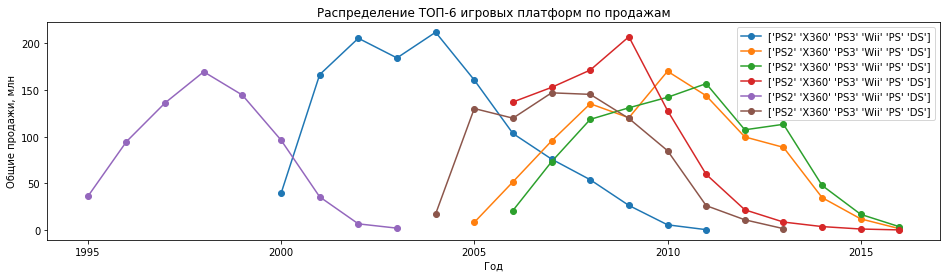

In [42]:
plt.figure().set_figwidth(16)
plt.title('Распределение ТОП-6 игровых платформ по продажам')
plt.xlabel('Год')
plt.ylabel('Общие продажи, млн')

plt.plot(x_list, table_merge(df), label = table_merge(df).columns.values, marker = 'o')
plt.legend()
plt.show()

Из графика видно, что для большинства платформ характерен постепенный рост и спад, исключение платформа **Wii**, у которой самые высокие показатели для начала периода. 

Хорошо видно, что для **1995-2005** года характерны 2 основные компании - **PS и PS2**, а с 2005 года таких компаний уже 4. 

С 1995 года по 2000 лидирует PS, затем ее заменяет PS2, в 2005 на рынке появляется PS3, X360, DS и Wii. К 2015-2016 году эти компании находятся на спаде. 

**Таким образом, характерный период для появления новых платформ - 5 лет, жизненный цикл платформы около 10 лет.** Соотвественно, чтобы найти потенциально прибыльные платформы необходимо рассматривать платформы, которые появились 2-4 года назад.

#### 3.3. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [43]:
#Так как в предыдущем шаге было видно, что у компаний подъем происходит за 2-4 года, рассмторим период с 2013 по 2016. 
sales_rasp = (df
     .query('year_of_release > 2012')
     .pivot_table(index = 'platform', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum').fillna(0)
     .sort_values(by = 2013)
    )

In [44]:
sales_rasp

year_of_release,2013,2014,2015,2016
platform,,,,
DS,1.54,0.00,0.00,0.00
PSP,3.14,0.24,0.12,0.00
Wii,8.59,3.75,1.14,0.18
PSV,10.59,11.90,6.25,4.25
PC,12.38,13.28,8.52,5.25
XOne,18.96,54.07,60.14,26.15
WiiU,21.65,22.03,16.35,4.60
PS4,25.99,100.00,118.90,69.25
3DS,56.57,43.76,27.78,15.14


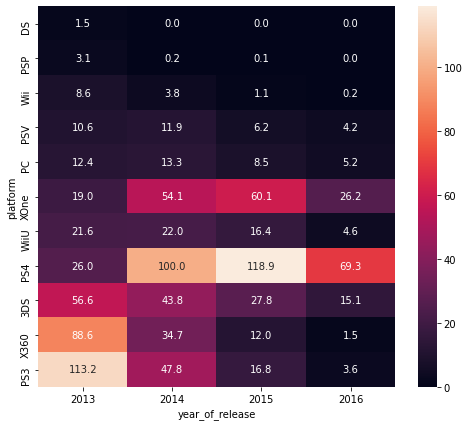

In [45]:
f, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(sales_rasp, annot = True, fmt=".1f");

Платформы в верхней части графика - **DS, PSP, Wii, PSV, PC** имеют достаточно низкие показатели и скорее всего находятся **в периоде спада**, это было видно, например, для платформ **Wii** и **DS** на графике распределения по годам.

Можно увидеть 3 платформы внизу таблицы - **PS3, X360, 3DS**, которые в 2013 году лидировали по продажам, но постепенно их показатели уменьшаются. То есть, **продажи с этих платформ тоже снижаются**.

И отчетливо выделяются 2 платформы - **XOne, PS4**, общие продажи которых росли в 2014-2015 годах, но к 2016 году их продажи так же снижаются. (но данные за 2016 не полные, поэтому ,возможно, там будут другие значения). Тем не менее, на эти платформы стоит обратить внимание, как на **потенциально прибыльные**.

#### 3.4. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [46]:
#запишем в отдельную таблицу данные за период с 2013 года
df_query_period = df.query('year_of_release >= 2013')

In [47]:
df_query_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16701,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16705,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


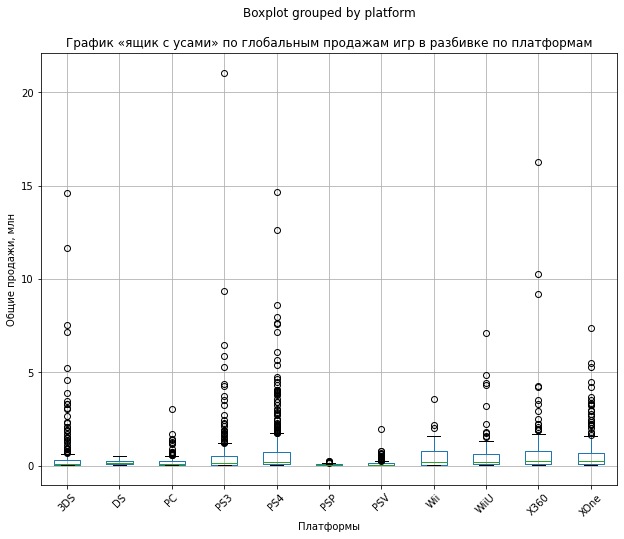

In [48]:
fig, ax = plt.subplots(figsize = (10,8))
df_query_period.boxplot(column = 'total_sales', by = 'platform', ax=ax)
ax.tick_params('x', rotation = 45)
plt.title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи, млн')
plt.show()

По данному графику мало видно распределение, необходимо установить границы по общим продажам, но здесь хорошо виден **сильный выброс у платформы PS3 с продажами более 20 млн. копий (игра Grand Theft Auto V)** и у платформы **X360**. 

In [49]:
#функция для сортировки медианы по возрастанию
def boxplot_sort(df, column, by):
    data = pd.DataFrame({col: vals[column] for col, vals in df.groupby(by)})
    med = data.median().sort_values(ascending = True)
    data[med.index].boxplot()

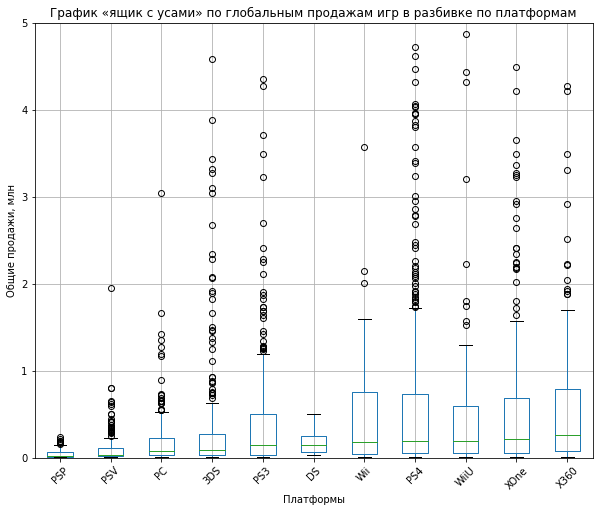

In [50]:
fig, ax = plt.subplots(figsize = (10, 8))
boxplot_sort(df_query_period, 'total_sales', 'platform')
ax.set_ylim(0, 5)
ax.tick_params('x', rotation = 45)
plt.title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи, млн')
plt.show()

Медианы для всех платформ находятся на уровне от 0.01 до 0.3 млн.копий. Для большинства характерны выбросы, которые скорее всего связаны с очень популярными играми.

На данном графике **наибольшее значение медианы** у платформ **X360**, следом за ней платформа **XOne**.

Можно заменить, что для 5 платформ справа на графике: **Wii, PS4, WiiU, XOne, X360** боксплоты имеют схожее распределение. Большее значение верхнего квартиля и максимальной границы для данных платформ говорит, что значительная часть игр находится выше медианы и игры имеет хорошие показатели по продажам. Например, у платформы **PS4** больше всего выбросов с общими продажами более 1.5 млн. копий.

#### 3.5. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 

In [51]:
#возьмем самую популярную платформу
df_query_period['platform'].value_counts().head(5).to_frame()

,platform
PS4,392
PSV,358
PS3,345
3DS,303
XOne,247


In [52]:
#Самой популярной платформой на заданный период оказалась - PS4.
(df_query_period
 .query('platform == "PS4"').corr()
 .style.background_gradient(cmap='Blues', axis=0, low=0, high=0)
)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
total_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


Для наиболее популярной платформы - **PS4 корреляция между общими продажами и отзывами критиков - 0.4**, что говорит о слабой положительной корреляции. Если рассматривать отдельно по территории продаж, то для продаж в Северной Америке - 0.41, в Европе - 0.35, в Японии - 0.32. 

Корреляция между **общими продажами и отзывами пользователей: -0.03**, что говорит об отсутствии зависимости между этими двумя величинами.

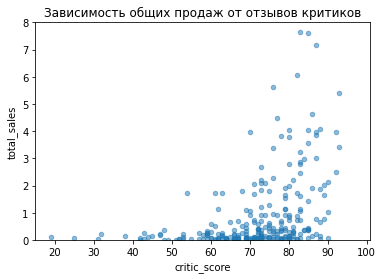

In [53]:
(df_query_period
  .query('platform == "PS4"')
  .plot(x='critic_score', y='total_sales', kind='scatter', alpha = 0.5, ylim = (0,8), title = 'Зависимость общих продаж от отзывов критиков')
);

По диаграмме рассеяния видно, что чем больше оценка критиков, тем большие продажи может достигать игра. Максимальные значения по общим продажам у игр, чья оценка от критиков от 80.

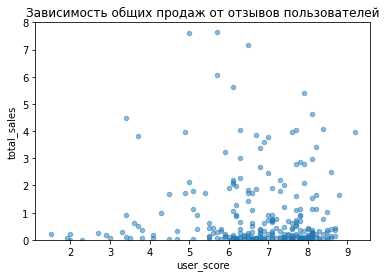

In [54]:
(df_query_period
  .query('platform == "PS4"')
  .plot(x='user_score', y='total_sales', kind='scatter', alpha = 0.5, ylim = (0,8), title = 'Зависимость общих продаж от отзывов пользователей')
);

На данной диаграме расеяния не видна четкая зависимость, игры с высоким рейтингом могут иметь, как высокие, так и низкие продажи. Это достаточно логично, так как люди сначала все равно покупают игру, а потом оценивают. Хорошая рекламная компания может поднимать спрос на игру, но не факт, что она будет высока оценена пользователями.

Посмотрим, как обстоит ситуция для всех платформ.

In [55]:
df_query_period.corr().style.background_gradient(cmap='Blues', axis=0, low=0, high=0)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.124551,-0.087983,-0.074142,-0.090225,0.064322,0.039318,-0.117878
na_sales,-0.124551,1.000000,0.769995,0.264513,0.817367,0.301130,-0.020010,0.922617
eu_sales,-0.087983,0.769995,1.000000,0.244616,0.934796,0.280785,-0.027040,0.928031
jp_sales,-0.074142,0.264513,0.244616,1.000000,0.195192,0.134143,0.194025,0.434394
other_sales,-0.090225,0.817367,0.934796,0.195192,1.000000,0.275289,-0.011500,0.921370
critic_score,0.064322,0.301130,0.280785,0.134143,0.275289,1.000000,0.502221,0.313700
user_score,0.039318,-0.020010,-0.027040,0.194025,-0.011500,0.502221,1.000000,-0.002608
total_sales,-0.117878,0.922617,0.928031,0.434394,0.921370,0.313700,-0.002608,1.000000


При рассмотрении всех платформ за период с 2013 по 2016 **корреляция между отзывами критиков и общими продажами составила 0.31**, что является нижней границей положительной слабой корреляции. **Зависимости между общими продажами и отзывами пользователей нет.**

Таким образом, для одной из популярных платформ - PS4 существует слабая положительная корреляция между общими продажами и отзывами критиков. При этом зависимость между общими продажами и отзывами пользователей не обнаружилась.

#### 3.6. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

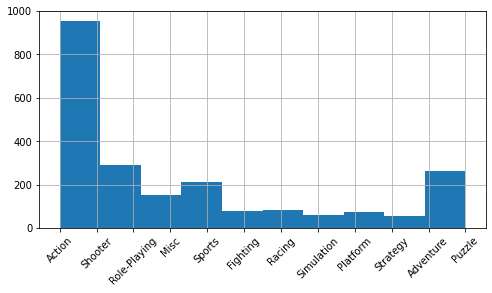

In [56]:
df_query_period['genre'].hist(figsize = (8,4), xrot = 45);

Из гистограммы видно, что больше всего игр в жанре **Action** (почти 1000), далее с большой разницей идут **Shooter, Sports и Adventure**. 

In [57]:
genre_table = df_query_period.pivot_table(index = ['genre'], values = 'total_sales', aggfunc = ['sum', 'count', 'median'])

In [58]:
(genre_table.style
    .highlight_min(color = 'orange', axis = 0)
    .highlight_max(color = 'lightgreen', axis = 0)
)

,sum,count,median
,total_sales,total_sales,total_sales
genre,,,
Action,321.870000,766,0.110000
Adventure,23.640000,245,0.030000
Fighting,35.310000,80,0.125000
Misc,62.820000,155,0.100000
Platform,42.630000,74,0.225000
Puzzle,3.170000,17,0.060000
Racing,39.890000,85,0.120000
Role-Playing,145.890000,292,0.125000


По таблице видно, что общие продажи наиболее высокие у жанра **Action**, при этом и количество выпущенных игр в данном жанре максимальное. Наименьшие общие продажи у жанра **Puzzle, Strategy, Simulation**.

Но самым прибыльным является жанр - **Shooter**, у которого медианные продажи намного выше, чем у других жанров. Наименее прибыльные жанры - **Adventure, Puzzle, Simulation** (но это без учета заложенных средств).

**Вывод**:

**1)** Наибольшее число игр было выпущено в период с 2006 по 2011 годы, лидер - 2008 год.

**2)** При анализе 6 наиболее популярных игровых платформ было выявлено, что **в среднем платформа проходит стадии роста, пика и спада за 10 лет.** Новые популярные платформы появляются в течении 5 лет, например, одни версии сменяют другие. При составлении будущей кампании необходимо учитывать на каком этапе сейчас та или иная платформа, так можно предсказать ее дальнейшее движение. **Оптимальным является срок от 2 до 4 лет с начала выпуска.** Для дальнейшего анализа использовался период с 2013 по 2016 гг.

**3)** Потенциально прибыльными можно назвать 2 платформы: **XOne и PS4**, так как на 2015-2016 гг. у них были самые высокие показатели общих продаж. Продажи с других платформ (PS3, X360, 3DS) постепенно снижаются.

**4)** Медианы для всех платформ находятся на уровне от 0.01 до 0.3 млн.копий. Наибольшее значение медианы общих продаж у **платформы X360, следом за ней платформа XOne.** Было выявлено, что 5 платформ **(Wii, PS4, WiiU, XOne, X360)** имеют схожее распределение и имеют высокие показатели по общим продажам. 

**5)** Для одной из популярных платформ - **PS4** была найдена слабая положительная корреляция **между общими продажами и отзывами критиков.** При этом зависимость между общими продажами и отзывами пользователей не обнаружилась.

**6)** По общим продажам среди жанров лидирует **Action**, в конце списка жанры - **Puzzle, Strategy, Simulation**. Наиболее прибыльный жанр (в расчете медианных общих продаж) - **Shooter**.


### Шаг 4. Составьте портрет пользователя каждого региона

#### 4.1. Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5).

In [59]:
na_plat = df_query_period.groupby('platform')['na_sales'].sum().to_frame().sort_values(by = ['na_sales'], ascending = False).head(5)
eu_plat = df_query_period.groupby('platform')['eu_sales'].sum().to_frame().sort_values(by = ['eu_sales'], ascending = False).head(5)
jp_plat = df_query_period.groupby('platform')['jp_sales'].sum().to_frame().sort_values(by = ['jp_sales'], ascending = False).head(5)

In [60]:
na_plat

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [61]:
eu_plat

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [62]:
jp_plat

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


Для покупателей из **Северной Америки** в ТОП-5 платформ по продажам входят: **PS4, XOne, X360, PS3, 3DS.**

Для покупателей из **Европы** в ТОП-5 платформ по продажам входят: **PS4, PS3, XOne, X360, 3DS.**

Для покупателей из **Японии** в ТОП-5 платформ по продажам входят: **3DS, PS3, PSV, PS4, WiiU.**

In [63]:
dif_sales_plat = df_query_period.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by = ['na_sales'], ascending = False)
dif_sales_plat.style.background_gradient(cmap='Blues', axis=0, low=0, high=0)

,na_sales,eu_sales,jp_sales
platform,,,
PS4,108.740000,141.090000,15.960000
XOne,93.120000,51.590000,0.340000
X360,81.660000,42.520000,0.510000
PS3,63.500000,67.810000,23.350000
3DS,38.200000,30.960000,67.810000
WiiU,29.210000,19.850000,10.880000
PC,11.110000,25.360000,0.000000
Wii,6.560000,5.930000,0.050000
PSV,5.040000,6.100000,18.590000


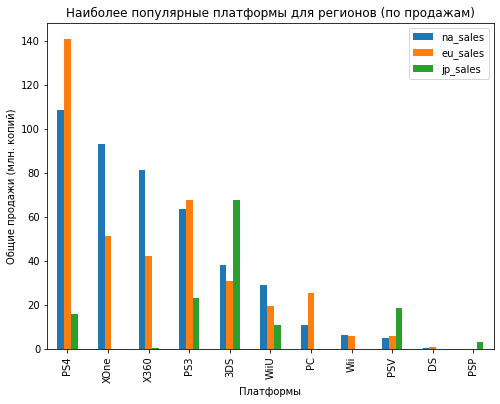

In [64]:
dif_sales_plat.plot\
(kind="bar", title = 'Наиболее популярные платформы для регионов (по продажам)', figsize = (8,6), xlabel = 'Платформы', ylabel = 'Общие продажи (млн. копий)');

По общему распределению видно, что покупатели из Японии сильнее отличаются в предпочтениях в платформах, чем покупатели из Северной Америки и Европы. 

Например, **один из лидеров в Северной Америке и Европе - PS4 имеет очень низкие продажи в Японии**, а нижная часть список, где совсем нет продаж из Северной Америки и Европы имеет небольшие продажи в Японии. Скорее всего это локальные платформы. 

#### 4.2. Самые популярные жанры (топ-5).

In [65]:
na_genre = df_query_period.groupby('genre')['na_sales'].sum().to_frame().sort_values(by = ['na_sales'], ascending = False).head(5)
eu_genre = df_query_period.groupby('genre')['eu_sales'].sum().to_frame().sort_values(by = ['eu_sales'], ascending = False).head(5)
jp_genre = df_query_period.groupby('genre')['jp_sales'].sum().to_frame().sort_values(by = ['jp_sales'], ascending = False).head(5)

In [66]:
na_genre

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [67]:
eu_genre

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [68]:
jp_genre

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


Для покупателей из **Северной Америки** самые популярные жанры игр **Action, Shooter, Sports, Role-Playing, Misc(другое)**.

Для покупателей из **Европы** самые популярные жанры игр **Action, Shooter, Sports, Role-Playing, Racing**.

Для покупателей из **Японии** самые популярные жанры игр **Role-Playing, Action, Misc(другое), Fighting, Shooter**.

In [69]:
dif_genre = df_query_period.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by = ['na_sales'], ascending = False)
dif_genre.style.background_gradient(cmap='Blues', axis=0, low=0, high=0)

,na_sales,eu_sales,jp_sales
genre,,,
Action,126.050000,118.130000,40.490000
Shooter,109.740000,87.860000,6.610000
Sports,65.270000,60.520000,5.410000
Role-Playing,46.400000,36.970000,51.040000
Misc,27.490000,20.040000,9.200000
Platform,18.140000,15.580000,4.790000
Fighting,15.550000,8.550000,7.650000
Racing,12.960000,20.190000,2.300000
Adventure,7.140000,8.250000,5.820000


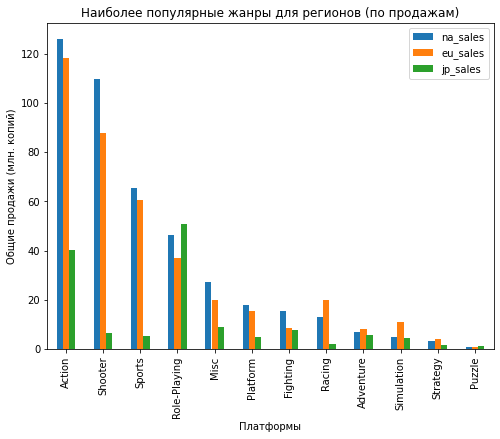

In [70]:
dif_genre.plot\
(kind="bar", title = 'Наиболее популярные жанры для регионов (по продажам)', figsize = (8,6), xlabel = 'Платформы', ylabel = 'Общие продажи (млн. копий)');

Из общего распределния также видно, что покупатели из Японии отличаются в предпочтениях жанра от покупателей из Северной Америки и Европы. 

Жанры **Action и Shooter**, которые одни из наиболее популярных в Северной Америки и Европе не пользуется популярностью у покупателей из Японии, а жанр **Role-Playing** является самым популярным в Японии в отличии от других регионов. Скорее всего это можно объяснить различиями в культуре и предпочтениях.

#### 4.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [71]:
dif_rating = df_query_period.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by = ['na_sales'], ascending = False)
dif_rating.style.background_gradient(cmap='Blues', axis=0, low=0, high=0)

,na_sales,eu_sales,jp_sales
rating,,,
M,165.210000,145.320000,14.110000
E,79.050000,83.360000,15.140000
E10+,54.240000,42.690000,5.890000
T,49.790000,41.950000,20.590000


Из таблицы видно, что для продаж в Северной Америки и Европы наибольшее число игр относится к рейтингу **M (подходит для лиц старше 17 лет)**, для покупателей из Японии наиболее популярный рейтинг - **Т (подходит для лиц старше 13 лет)**.

**Вывод:**

**1)** Пользователи из групп (Северной Америки, Европы, Японии) в различаются по платформам и жанрам. Причем, пользователи из Северной Америки и Европы имеют схожие предпочтения по платформам и жанрам, в отличии от пользователй из Японии. Для последних характерны другие игровые платформы (например, локальные) и другие жанры игр.  

**2)** Рейтинг ESRB различается по регионам, что скорее всего и влияет на самые популярные жанры. 

Таким образом, необходимо представлять целевую аудиторию для будущих рекламных компаний: для стран **Северной Америки и Европы это пользователи старше 17 лет, с предпочтениями в жанре Action и Shooter.** В **Японии это лица старше 13 лет, которые предпочитает жанры Role-Playing и Action**.

### Шаг 5. Проверьте гипотезы

#### 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**H0: M1 = M2** - нулевая гипотеза: средние двух выборок равны

**H1: M1 != M2** - альтернативная гипотеза: средние двух выборок не равны

Исходя из графика "ящик с усами" для всех платформ в пункте 3.4. буду делать t-критерий Уэлча и предполагать, что дисперсии не одинаковые, потому что боксплоты для этих выборок достаточно сильно отличаются. 

**α = 0.05** (наиболее распространенное значение)

In [72]:
#сделаем списки с значениями оценок пользователей для двух рассматриваемых платформ
score_xbox = df_query_period[(df_query_period['platform'] == 'XOne') & (~df_query_period['user_score'].isna())]['user_score'].to_list()
score_pc = df_query_period[(df_query_period['platform'] == 'PC') & (~df_query_period['user_score'].isna())]['user_score'].to_list()

In [73]:
from scipy import stats as st
results = st.ttest_ind(score_xbox, score_pc, equal_var = False)
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Тест показал, что мы **не может отвергнуть нулевую гипотезу о равенстве**, для наглядности построим доверительные интервалы.

In [74]:
score_xbox_pc = pd.DataFrame({'Выборка_Xbox':score_xbox}).agg(['mean','std','count','sem']).transpose().\
append(pd.DataFrame({'Выборка_PC':score_pc}).agg(['mean','std','count','sem']).transpose())
score_xbox_pc.columns = ['Mx','SD','N','SE']

In [75]:
score_xbox_pc

,Mx,SD,N,SE
Выборка_Xbox,6.521429,1.380941,182.0,0.102362
Выборка_PC,6.269677,1.742381,155.0,0.139951


In [76]:
# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = t.ppf((1 + p)/2, score_xbox_pc['N']-1)   
score_xbox_pc['interval'] = K * score_xbox_pc['SE']

In [77]:
score_xbox_pc

,Mx,SD,N,SE,interval
Выборка_Xbox,6.521429,1.380941,182.0,0.102362,0.201977
Выборка_PC,6.269677,1.742381,155.0,0.139951,0.276472


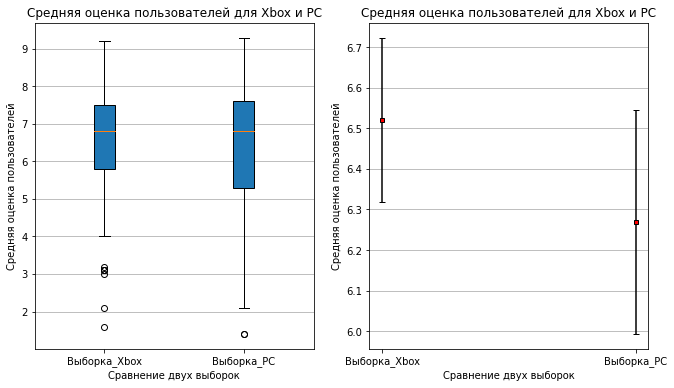

In [78]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))

# график boxplot
bplot1 = ax1.boxplot([score_xbox, score_pc],
                     vert=True,  
                     patch_artist=True, 
                     labels=['Выборка_Xbox', 'Выборка_PC']) 

# график доверительных интервалов
bplot2 = ax2.errorbar(x=score_xbox_pc.index, y=score_xbox_pc['Mx'], yerr=score_xbox_pc['interval'],\
                      color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')

for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Средняя оценка пользователей для Xbox и PC')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Средняя оценка пользователей')
    
plt.show()

На графике со с доверительными интервалами видно, что среднее одной выборки входит в доверительный интервал второй выборки.

Таким образом, **нельзя отклонить нулевую гипотезу о равенстве средних пользовательских оценок для платформы Xbox One и платформы PC**.

#### 5.2. Средние пользовательские рейтинги жанров Action  и Sports разные.

**H0: M1 = M2** - нулевая гипотеза: средние двух выборок равны

**H1: M1 != M2** - альтернативная гипотеза: средние двух выборок не равны

Буду делать t-критерий Уэлча и предполагать, что дисперсии разные, так как эти два жанра различны по количеству игр за исследуемый период и по общим продажам.

**α = 0.05** (наиболее распространенное значение)

In [79]:
score_action = df_query_period[(df_query_period['genre'] == 'Action') & (~df_query_period['user_score'].isna())]['user_score'].to_list()
score_sports = df_query_period[(df_query_period['genre'] == 'Sports') & (~df_query_period['user_score'].isna())]['user_score'].to_list()

In [80]:
from scipy import stats as st
results = st.ttest_ind(score_action, score_sports, equal_var = False)
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704315e-20
Отвергаем нулевую гипотезу


In [81]:
score_act_sport = pd.DataFrame({'Выборка_action':score_action}).agg(['mean','std','count','sem']).transpose().\
append(pd.DataFrame({'Выборка_sports':score_sports}).agg(['mean','std','count','sem']).transpose())
score_act_sport.columns = ['Mx','SD','N','SE']

In [82]:
score_act_sport

,Mx,SD,N,SE
Выборка_action,6.837532,1.330173,389.0,0.067442
Выборка_sports,5.238125,1.783427,160.0,0.140992


In [83]:
p = 0.95
K = t.ppf((1+p)/2, score_act_sport['N']-1)
score_act_sport['interval'] = K*score_act_sport['SE']

In [84]:
score_act_sport

,Mx,SD,N,SE,interval
Выборка_action,6.837532,1.330173,389.0,0.067442,0.132598
Выборка_sports,5.238125,1.783427,160.0,0.140992,0.278459


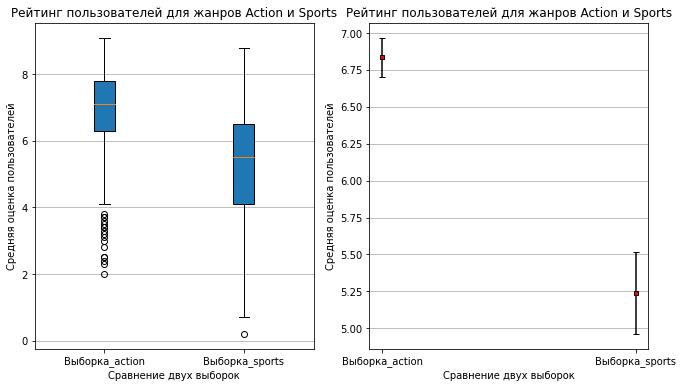

In [85]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))

# график boxplot
bbbplot1 = ax1.boxplot([score_action, score_sports],
                     vert=True,  
                     patch_artist=True, 
                     labels=['Выборка_action', 'Выборка_sports']) 

# график доверительных интервалов
bbbplot2 = ax2.errorbar(x=score_act_sport.index, y=score_act_sport['Mx'], yerr=score_act_sport['interval'],\
                      color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')
   
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Рейтинг пользователей для жанров Action и Sports')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Средняя оценка пользователей')
    
plt.show()

Видно, что доверительные интервалы находятся на большом расстоянии друг от друга, среднее одной выборки даже не входит в доверительный интервал второй выборки. Среднее для жанра Action сильно выше, чем для жанра Sports.

Таким образом, мы **можем отклонить нулевую гипотезу о равенстве средних пользовательских рейтингов для жанра Action и жанра Sports.**

#### Выводы:

   **1.** Было выявлено, что **в среднем жизненный цикл платформы составляет 10 лет.** Новые популярные платформы появляются в течении 5 лет, например, одни версии сменяют другие. При составлении будущей кампании необходимо учитывать на каком этапе сейчас та или иная платформа, так можно предсказать ее дальнейшее движение. 
   
   ***Оптимальным является срок начала деятельности платформы **от 2 до 4 лет.***
   
   **2**. Для 5 платформ: **Wii, PS4, WiiU, XOne, X360** боксплоты имеют схожее распределение. Большее значение верхнего квартиля и максимальной границы для данных платформ говорит, что значительная часть игр находится выше медианы и игры имеет хорошие показатели по продажам. **Например, у платформы PS4 больше всего выбросов с общими продажами более 1.5 млн. копий.**
   
   ***Потенциально прибыльными можно назвать 2 платформы: XOne и PS4, так как на 2015-2016 гг. у них были самые высокие показатели общих продаж.***
   
   **3.** Для наиболее популярной платформы - **PS4** *корреляция между общими продажами и отзывами критиков - **0.4**,* что говорит о слабой положительной корреляции. При рассмотрении всех платформ за период с 2013 по 2016 корреляция между отзывами критиков и общими продажами составила 0.31, что является нижней границей положительной слабой корреляции. Зависимости между общими продажами и отзывами пользователей не было обнаружено.
   
   ***Таким образом, для популярных платформ можно опираться на оценки критиков для составления будущих кампаний.***
   
   **5.** По общим продажам среди жанров лидирует **Action**, в конце списка жанры - **Puzzle, Strategy, Simulation.** Наиболее прибыльный жанр (в расчете медианных общих продаж) - **Shooter**.
   
   ***Для большей успешности кампании необходимо делать упор на игры в жанре Action и Shooter.*** 
   
   **6.** Было выявлено, что предпочтения пользователей из разных регионов различаются и это необходимо учитывать. Пользователи из Северной Америки и Европы имеют схожие предпочтения по платформам, жанрам и рейтингу ESRB в отличии от пользователй из Японии.
   
   ***Для стран Северной Америки и Европы это пользователи старше 17 лет, с предпочтениями в жанре Action и Shooter и используюзих платформы PS4, XOne. В Японии это лица старше 13 лет, которые предпочитает жанры Role-Playing и Action и платформу 3DS.***
   
   **6.** Не удалось отклонить нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC. И удалось отклонить нулевую гипотезу о равенстве средних пользовательских рейтингов для жанра Action и жанра Sports.
   
   ***Средние пользовательские оценки игр жанра Action выше, чем у жанра Sports.***
   

